In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import f_oneway #ANOVA

In [ ]:
# Leitura CSV
df_car = pd.read_csv("/content/car_price.csv.xls")
df_house = pd.read_csv("/content/kc_house_data.csv.xls")

In [ ]:
df_house.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,n,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,n,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,n,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,n,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,n,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df_house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.999000e+03,9.999000e+03,9999.000000,9999.000000,9999.000000,9.999000e+03,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,4.549550e+09,5.334366e+05,3.361636,2.061806,2053.088209,1.603696e+04,1.432043,0.238824,3.446345,7.594459,1749.596360,303.491849,1967.274427,91.642364,98077.970297,47.559852,-122.214626,1975.779178,13359.446945
std,2.863859e+09,3.770547e+05,0.916079,0.766884,911.227082,4.504326e+04,0.511869,0.766738,0.666322,1.165901,810.917694,450.852334,27.988987,417.830430,53.943113,0.140048,0.139017,672.264191,27316.491648
min,1.000102e+06,7.500000e+04,0.000000,0.000000,380.000000,5.720000e+02,1.000000,0.000000,1.000000,3.000000,380.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000,620.000000,660.000000
25%,2.114001e+09,3.150000e+05,3.000000,1.500000,1410.000000,5.427500e+03,1.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1950.000000,0.000000,98032.000000,47.461950,-122.326000,1490.000000,5417.500000
50%,3.905010e+09,4.458380e+05,3.000000,2.000000,1890.000000,7.920000e+03,1.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1969.000000,0.000000,98065.000000,47.573100,-122.231000,1830.000000,7848.000000
75%,7.272001e+09,6.399500e+05,4.000000,2.500000,2500.000000,1.117550e+04,2.000000,0.000000,4.000000,8.000000,2130.000000,600.000000,1990.000000,0.000000,98118.000000,47.679400,-122.126500,2340.000000,10374.500000
max,9.842301e+09,7.700000e+06,11.000000,8.000000,12050.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,8860.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


In [ ]:
df_house_corr=df_house.select_dtypes(['float64', 'int64'])

**Questão 1**

In [ ]:
correlation_matrix =df_house_corr.corr()

print("Matriz de Correlação entre as Variáveis Numéricas:")
print(correlation_matrix)

Matriz de Correlação entre as Variáveis Numéricas:
                     id     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
id             1.000000  0.005779  0.013855   0.007435     0.000415 -0.132510   
price          0.005779  1.000000  0.299207   0.521193     0.702199  0.090720   
bedrooms       0.013855  0.299207  1.000000   0.539449     0.573915  0.028929   
bathrooms      0.007435  0.521193  0.539449   1.000000     0.764810  0.091268   
sqft_living    0.000415  0.702199  0.573915   0.764810     1.000000  0.167809   
sqft_lot      -0.132510  0.090720  0.028929   0.091268     0.167809  1.000000   
floors         0.012260  0.276954  0.213565   0.494247     0.392802  0.021320   
view           0.035295  0.398731  0.090767   0.205681     0.293149  0.064464   
condition     -0.021744  0.044596  0.023435  -0.089029    -0.047375 -0.019324   
grade          0.012872  0.651100  0.360955   0.660915     0.763526  0.121719   
sqft_above    -0.007168  0.607763  0.464872   0.686311    

In [ ]:
correlation = df_house_corr['price'].corr(df_house_corr['bedrooms'])

print(f"A correlação entre o preço e o número de quartos é: {correlation}")

A correlação entre o preço e o número de quartos é: 0.29920721616918206


In [ ]:
df_house_filtrado = df_house_corr[df_house_corr['sqft_living'] > 2000]

In [ ]:
correlation = df_house_filtrado['price'].corr(df_house_filtrado['bedrooms'])

print(f"A correlação entre o preço e o número de quartos é: {correlation}")

print("Sim, existe uma diferença na correlação")


A correlação entre o preço e o número de quartos é: 0.11912115548964147
Sim, existe uma diferença na correlação


**Questão 2**

In [ ]:
df_bath_2 =df_house_corr[df_house_corr['bathrooms'] >= 2]

correlation = df_bath_2['price'].corr(df_bath_2['sqft_living'])

# Imprimir a correlação
print(f"A correlação entre o preço e a área total da casa, considerando apenas casas com pelo menos dois banheiros, é: {correlation}")

A correlação entre o preço e a área total da casa, considerando apenas casas com pelo menos dois banheiros, é: 0.7067107107996193


**Questão 3**

In [ ]:
correlation_bathrooms = {}

for num_bathrooms in  df_house_corr['bathrooms'].unique():
    df_subset =  df_house_corr[ df_house_corr['bathrooms'] == num_bathrooms]
    correlation = df_subset['sqft_living'].corr(df_subset['price'])
    correlation_bathrooms[num_bathrooms] = correlation

# Correlação para cada quantidade de banheiros
for num_bathrooms, correlation in correlation_bathrooms.items():
    print(f"Número de banheiros: {num_bathrooms}, Correlação: {correlation}")

Número de banheiros: 1.0, Correlação: 0.35952866286208274
Número de banheiros: 2.25, Correlação: 0.598274075637526
Número de banheiros: 3.0, Correlação: 0.5690329087491449
Número de banheiros: 2.0, Correlação: 0.44694458674958365
Número de banheiros: 4.5, Correlação: 0.7960398865810752
Número de banheiros: 1.5, Correlação: 0.4234046759314356
Número de banheiros: 2.5, Correlação: 0.5599451984669481
Número de banheiros: 1.75, Correlação: 0.44922451917233636
Número de banheiros: 2.75, Correlação: 0.5223965282074604
Número de banheiros: 3.25, Correlação: 0.5446591202382951
Número de banheiros: 4.0, Correlação: 0.5844797954618549
Número de banheiros: 3.5, Correlação: 0.5663917643233903
Número de banheiros: 0.75, Correlação: 0.357177770473229
Número de banheiros: 4.75, Correlação: 0.6493588759910098
Número de banheiros: 4.25, Correlação: 0.44476574630960036
Número de banheiros: 3.75, Correlação: 0.46553810504219867
Número de banheiros: 5.0, Correlação: 0.7472185072000779
Número de banheiros:

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


**Questão 4**

In [ ]:
df_filtrado = df_house_corr[df_house_corr['sqft_living'] > 3000]


correlacao_condition_price = df_filtrado['condition'].corr(df_filtrado['price'])

print(f"A correlação entre a condição da casa e o preço, considerando apenas casas com uma área total superior a 3000 pés quadrados, é: {correlacao_condition_price}")

A correlação entre a condição da casa e o preço, considerando apenas casas com uma área total superior a 3000 pés quadrados, é: 0.10527844723732609


**Questão 5**

In [ ]:
df_filtrado_bed = df_house_corr[df_house_corr['bedrooms'] >= 3]

correlacao_lat_price = df_filtrado_bed['lat'].corr(df_filtrado_bed['price'])
correlacao_long_price = df_filtrado_bed['long'].corr(df_filtrado_bed['price'])

# Exibir a correlação
print(f"A correlação entre a latitude (lat) e o preço (price) para casas com pelo menos três quartos é: {correlacao_lat_price}")
print(f"A correlação entre a longitude (long) e o preço (price) para casas com pelo menos três quartos é: {correlacao_long_price}")

A correlação entre a latitude (lat) e o preço (price) para casas com pelo menos três quartos é: 0.31255514248432165
A correlação entre a longitude (long) e o preço (price) para casas com pelo menos três quartos é: -0.0072753069929269365


**Questão 6**

In [ ]:
waterfront_grp = [df_house[df_house['waterfront'] == 'n']['price'], df_house[df_house['waterfront'] == 'y']['price']]

anova_resultado = f_oneway(*waterfront_grp)

print("Resultado da ANOVA:")
print(anova_resultado)

Resultado da ANOVA:
F_onewayResult(statistic=964.5733248785583, pvalue=2.97380815121432e-202)


**DataFrame - car_price**

In [ ]:
df_car.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


**Questão 7**

In [ ]:
df_car_corr=df_car.select_dtypes(['float64', 'int64'])

In [ ]:
correlation_matrix =df_car_corr.corr()

print("Matriz de Correlação entre as Variáveis Numéricas:")
print(correlation_matrix)

Matriz de Correlação entre as Variáveis Numéricas:
                       Price      Year  Kilometer    Length     Width  \
Price               1.000000  0.309381  -0.147276  0.568875  0.577100   
Year                0.309381  1.000000  -0.291740  0.085178  0.182220   
Kilometer          -0.147276 -0.291740   1.000000  0.037817  0.008479   
Length              0.568875  0.085178   0.037817  1.000000  0.797228   
Width               0.577100  0.182220   0.008479  0.797228  1.000000   
Height              0.092968  0.126849   0.085728  0.194704  0.326928   
Seating Capacity   -0.024879 -0.000113   0.111103  0.298527  0.229056   
Fuel Tank Capacity  0.586109  0.044859   0.052447  0.809812  0.791316   

                      Height  Seating Capacity  Fuel Tank Capacity  
Price               0.092968         -0.024879            0.586109  
Year                0.126849         -0.000113            0.044859  
Kilometer           0.085728          0.111103            0.052447  
Length         

**Questão 8**

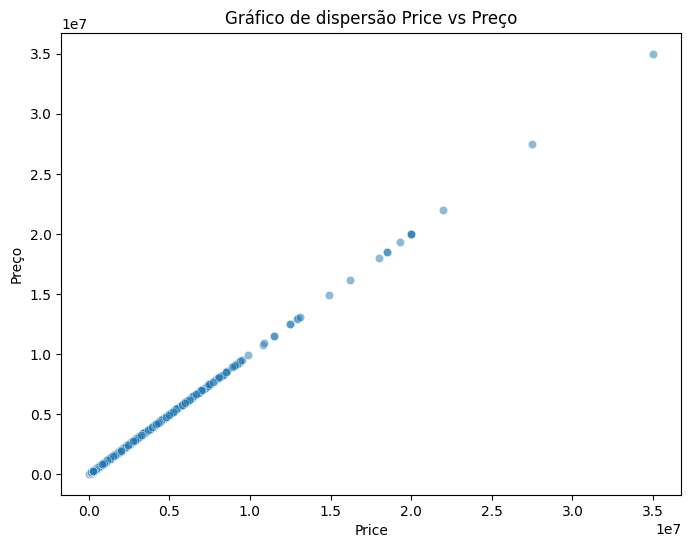

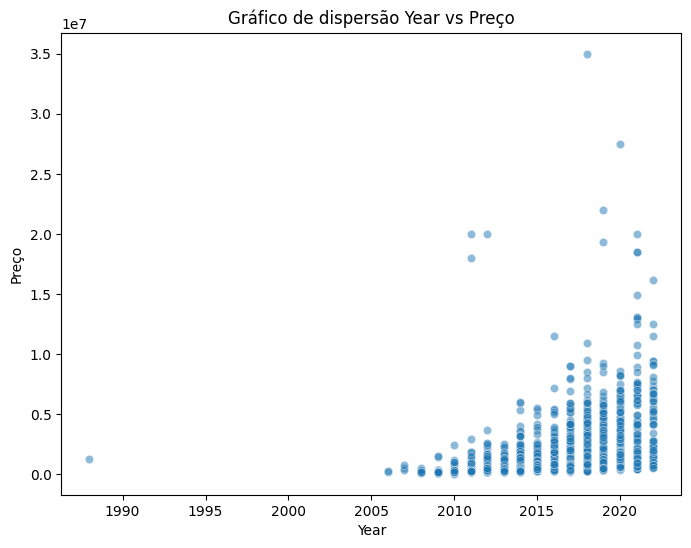

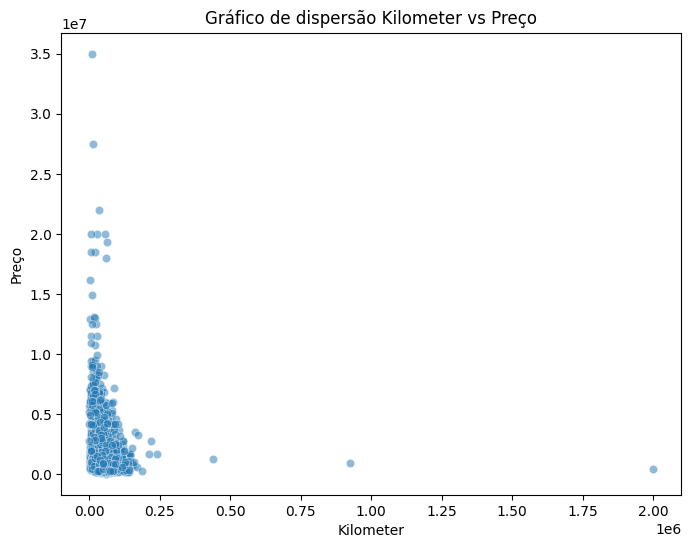

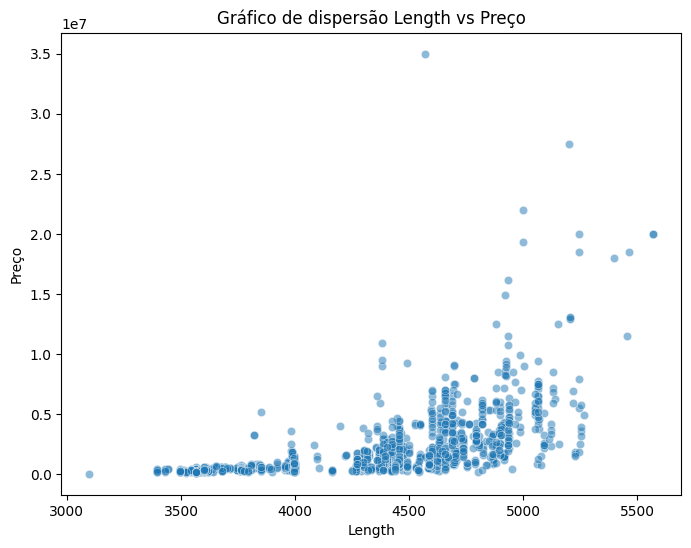

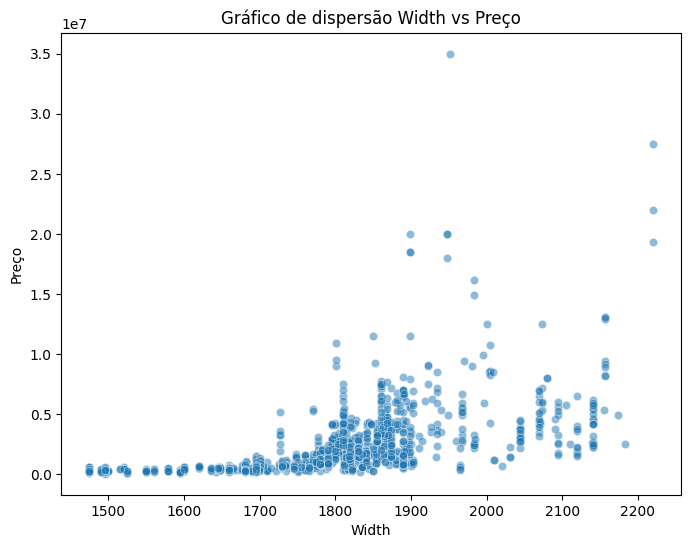

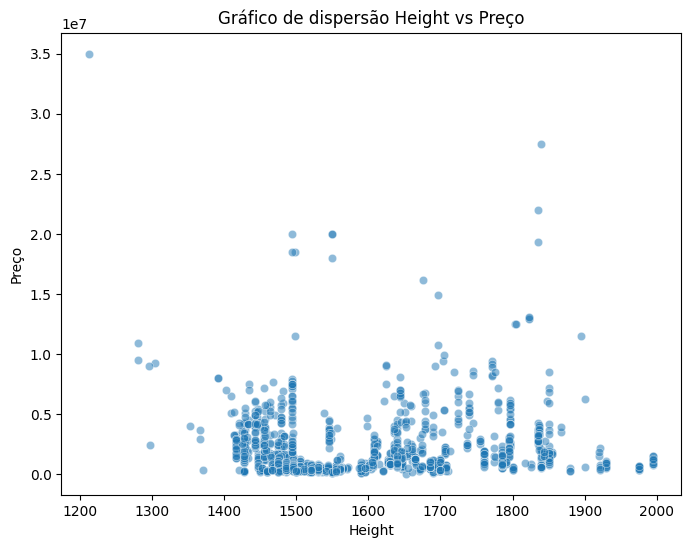

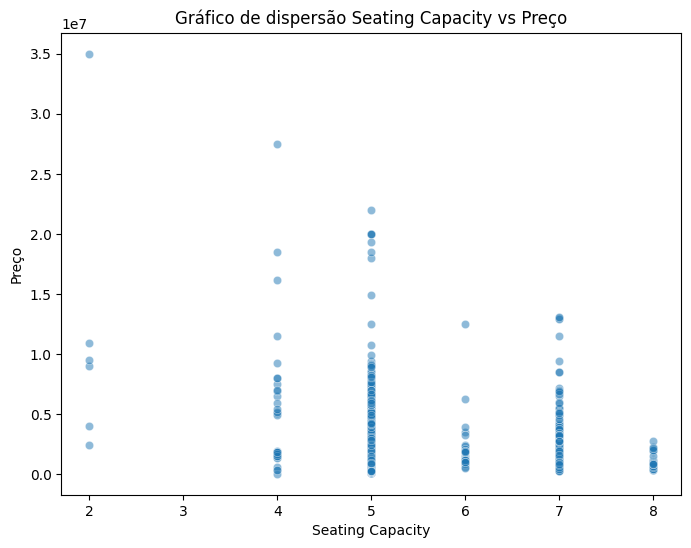

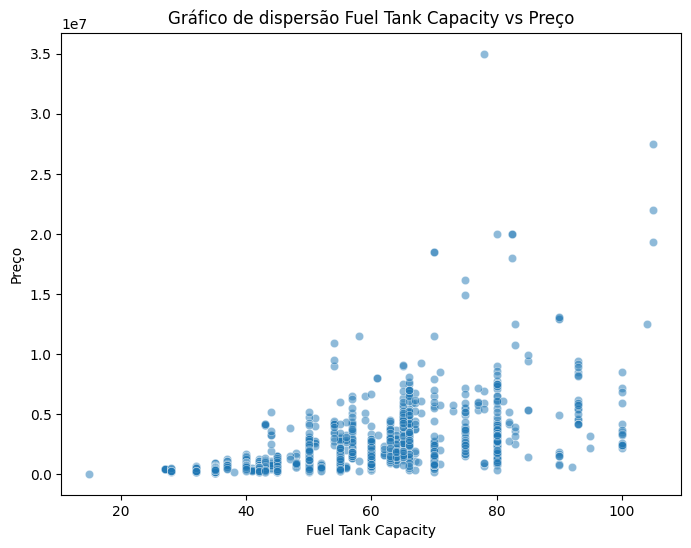

In [ ]:
for column in df_car_corr.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df_car_corr, x=column, y='Price', alpha=0.5)
    plt.title(f'Gráfico de dispersão {column} vs Preço')
    plt.xlabel(column)
    plt.ylabel('Preço')
    plt.show()
    print('\n')

**Questões 9 e 10**

Regressão Linear Simples para Price
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.454e+34
Date:                Mon, 13 May 2024   Prob (F-statistic):               0.00
Time:                        00:55:57   Log-Likelihood:                 36437.
No. Observations:                1874   AIC:                        -7.287e+04
Df Residuals:                    1872   BIC:                        -7.286e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.84

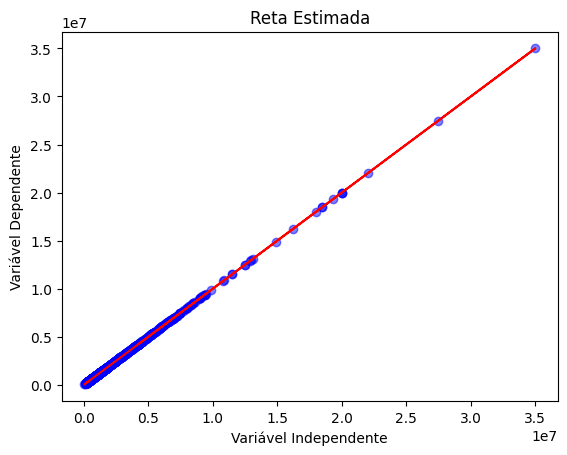

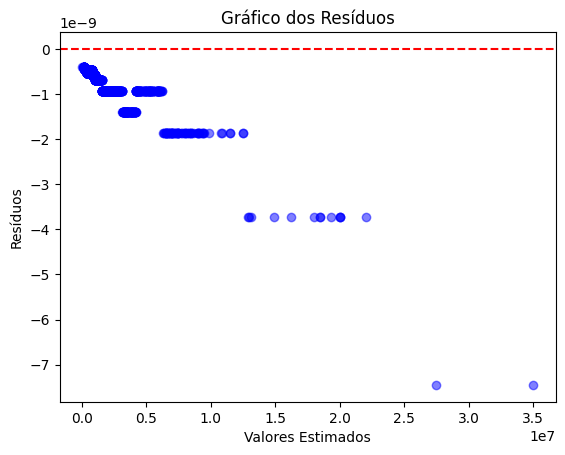





Regressão Linear Simples para Year
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     198.1
Date:                Mon, 13 May 2024   Prob (F-statistic):           7.48e-43
Time:                        00:55:58   Log-Likelihood:                -30115.
No. Observations:                1874   AIC:                         6.023e+04
Df Residuals:                    1872   BIC:                         6.025e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4

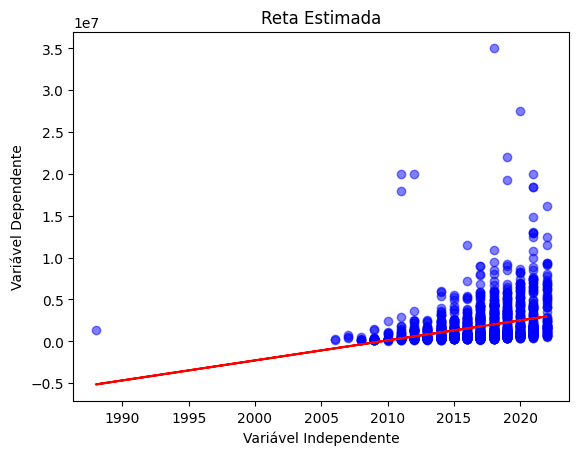

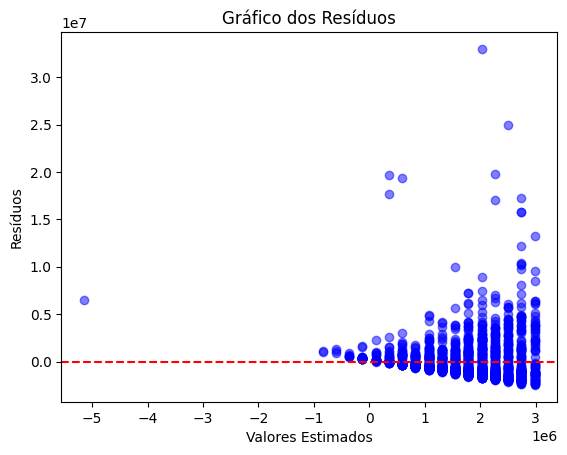





Regressão Linear Simples para Kilometer
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     41.50
Date:                Mon, 13 May 2024   Prob (F-statistic):           1.49e-10
Time:                        00:55:58   Log-Likelihood:                -30189.
No. Observations:                1874   AIC:                         6.038e+04
Df Residuals:                    1872   BIC:                         6.039e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const   

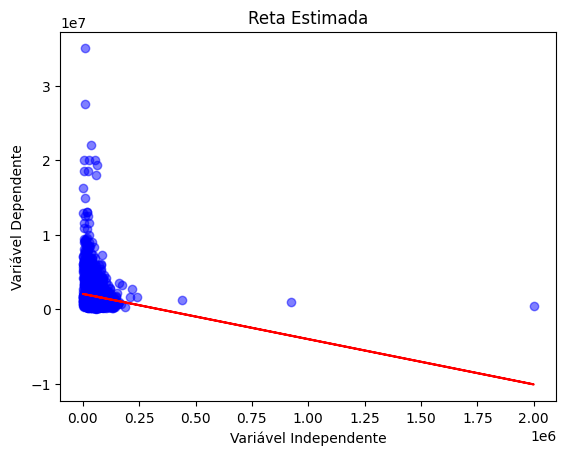

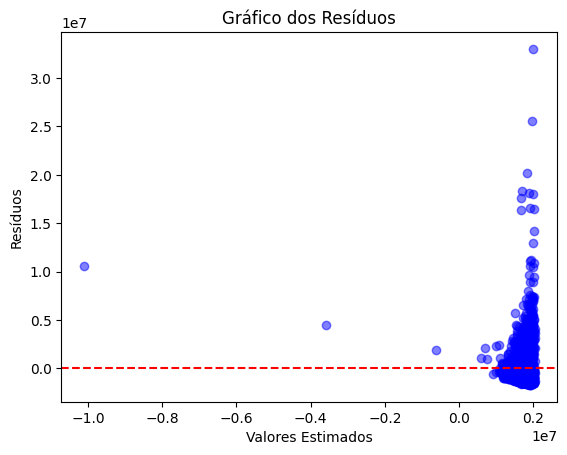





Regressão Linear Simples para Length
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     895.7
Date:                Mon, 13 May 2024   Prob (F-statistic):          3.71e-161
Time:                        00:55:59   Log-Likelihood:                -29843.
No. Observations:                1874   AIC:                         5.969e+04
Df Residuals:                    1872   BIC:                         5.970e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

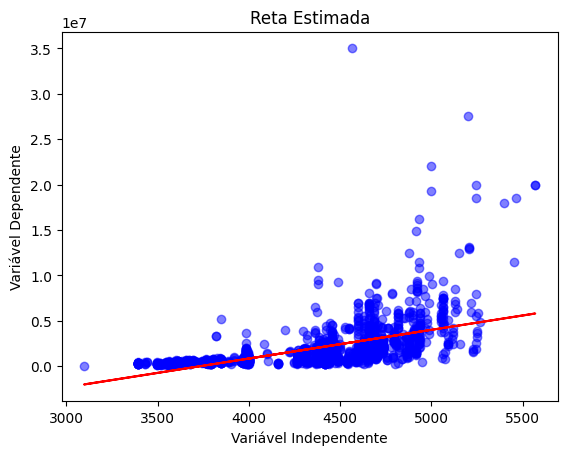

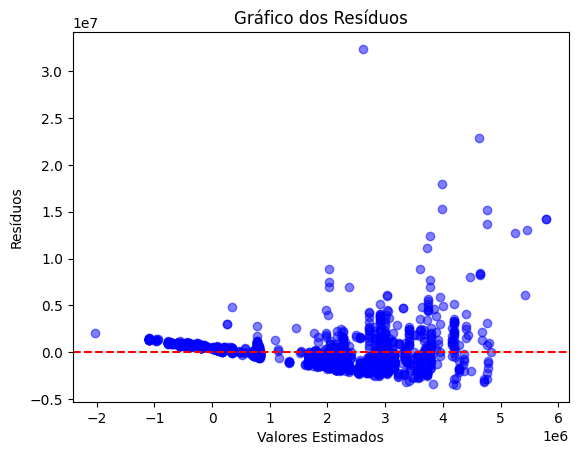





Regressão Linear Simples para Width
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     934.8
Date:                Mon, 13 May 2024   Prob (F-statistic):          7.23e-167
Time:                        00:56:00   Log-Likelihood:                -29830.
No. Observations:                1874   AIC:                         5.966e+04
Df Residuals:                    1872   BIC:                         5.968e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -

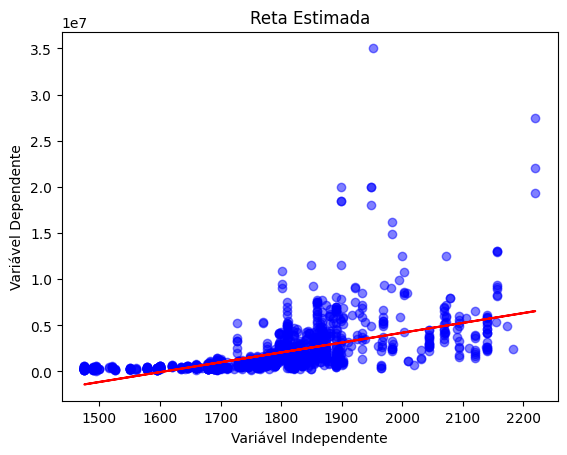

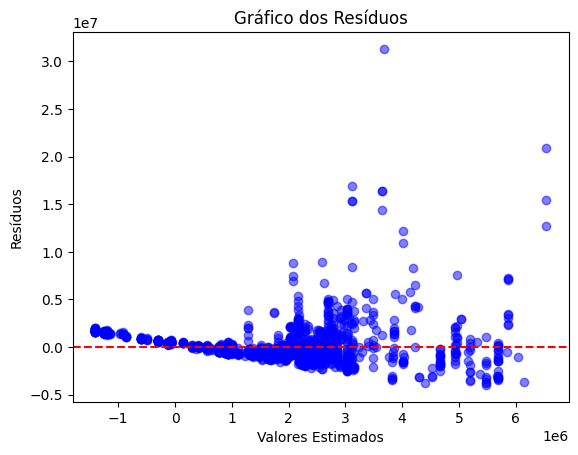





Regressão Linear Simples para Height
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     16.32
Date:                Mon, 13 May 2024   Prob (F-statistic):           5.56e-05
Time:                        00:56:00   Log-Likelihood:                -30202.
No. Observations:                1874   AIC:                         6.041e+04
Df Residuals:                    1872   BIC:                         6.042e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      

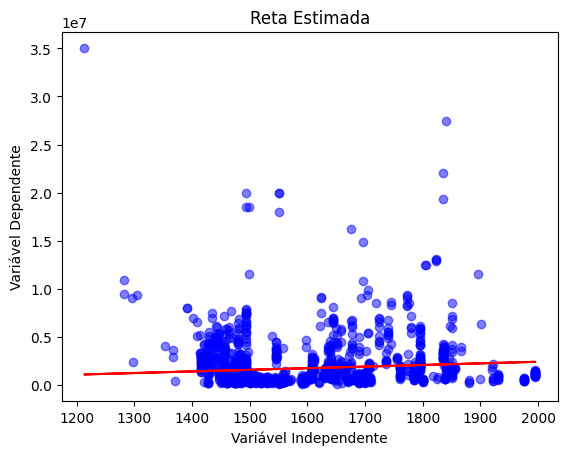

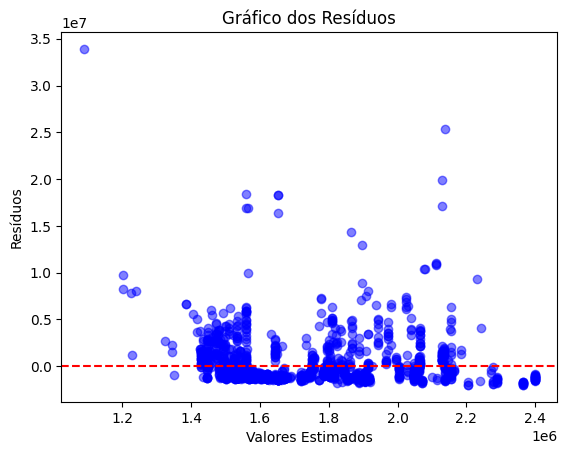





Regressão Linear Simples para Seating Capacity
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.159
Date:                Mon, 13 May 2024   Prob (F-statistic):              0.282
Time:                        00:56:01   Log-Likelihood:                -30209.
No. Observations:                1874   AIC:                         6.042e+04
Df Residuals:                    1872   BIC:                         6.043e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

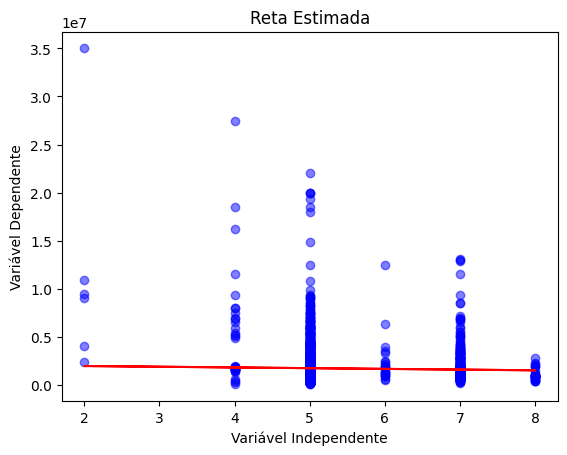

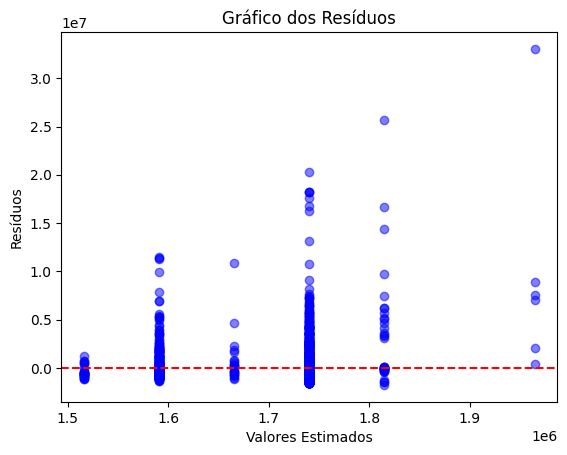





Regressão Linear Simples para Fuel Tank Capacity
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     979.6
Date:                Mon, 13 May 2024   Prob (F-statistic):          2.59e-173
Time:                        00:56:01   Log-Likelihood:                -29815.
No. Observations:                1874   AIC:                         5.963e+04
Df Residuals:                    1872   BIC:                         5.965e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

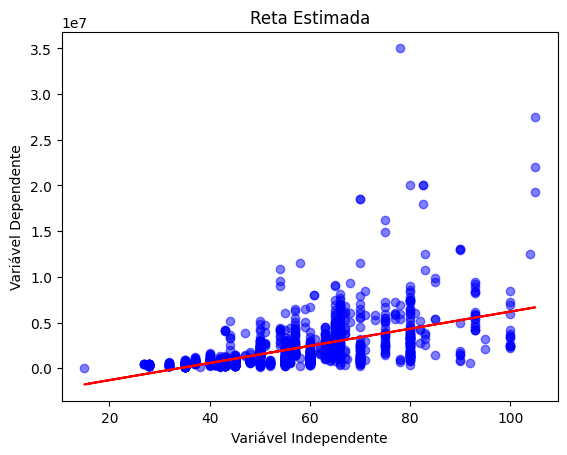

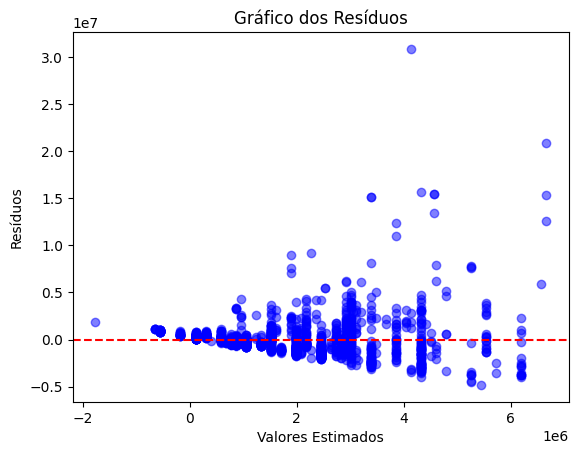

In [ ]:

for column in df_car_corr:

    X = sm.add_constant(df_car_corr[column])
    y = df_car_corr['Price']

    model = sm.OLS(y, X).fit()
    print(f'Regressão Linear Simples para {column}')
    print(model.summary())
    print('\n')
    print('\n')

    # Plotar a Reta Estimada
    plt.scatter(X.iloc[:, 1], y, color='blue', alpha=0.5)
    plt.plot(X.iloc[:, 1], model.predict(X), color='red')
    plt.title('Reta Estimada')
    plt.xlabel('Variável Independente')
    plt.ylabel('Variável Dependente')
    plt.show()

    print('\n')
    print('\n')

    # Gráfico dos resíduos

    y_pred = model.predict(X)
    residuos = y - y_pred

    plt.scatter(y_pred, residuos, color='blue', alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title('Gráfico dos Resíduos')
    plt.xlabel('Valores Estimados')
    plt.ylabel('Resíduos')
    plt.show()

    print('\n')
    print('\n')